In [2]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Define the path to the dataset and the class folders
data_dir = '/kaggle/input/plantvillage-potato-disease-dataset/PlantVillage'
class_dirs = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']



In [4]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [7]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))



In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [9]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# -------------------- Training --------------------
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

potato_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[early_stopping]
)

#training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - accuracy: 0.5011 - loss: 1.0377 - val_accuracy: 0.6674 - val_loss: 0.6994
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7018 - loss: 0.6433 - val_accuracy: 0.8744 - val_loss: 0.3427
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9101 - loss: 0.2356 - val_accuracy: 0.9395 - val_loss: 0.1795
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9158 - loss: 0.2039 - val_accuracy: 0.9140 - val_loss: 0.2026
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9373 - loss: 0.1673 - val_accuracy: 0.9581 - val_loss: 0.1208
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9742 - loss: 0.0782 - val_accuracy: 0.9581 - val_loss: 0.1114
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9725 - loss: 0.0685 - val_accuracy: 0.9512 - val_loss: 0.1318
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9795 - loss: 0.0579 - val_accuracy: 0.9488 -

In [11]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9896 - loss: 0.0284
Training accuracy: 0.9883856177330017


In [12]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9598 - loss: 0.0962
Validation accuracy: 0.960465133190155


In [13]:
cnn.save('/kaggle/working/potato_model.keras')

In [14]:
potato_history.history #Return Dictionary of history

{'accuracy': [0.5406504273414612,
  0.7822299599647522,
  0.9105691313743591,
  0.9297328591346741,
  0.9448316097259521,
  0.976190447807312,
  0.9709640145301819,
  0.9808362126350403,
  0.9750290513038635,
  0.9698025584220886],
 'loss': [0.9112875461578369,
  0.5019598007202148,
  0.23320771753787994,
  0.18456144630908966,
  0.14711743593215942,
  0.07063116133213043,
  0.07569520175457001,
  0.060964494943618774,
  0.05940175801515579,
  0.08346206694841385],
 'val_accuracy': [0.6674418449401855,
  0.8744186162948608,
  0.9395349025726318,
  0.9139534831047058,
  0.9581395387649536,
  0.9581395387649536,
  0.9511628150939941,
  0.9488372206687927,
  0.960465133190155,
  0.9255813956260681],
 'val_loss': [0.6994016170501709,
  0.3427448272705078,
  0.17945414781570435,
  0.20264297723770142,
  0.12079602479934692,
  0.1113744005560875,
  0.13181327283382416,
  0.13337892293930054,
  0.09257011115550995,
  0.21170589327812195]}

In [15]:
import json
with open('/kaggle/working/potato_model.json','w') as f:
  json.dump(potato_history.history,f)

In [16]:
print(potato_history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


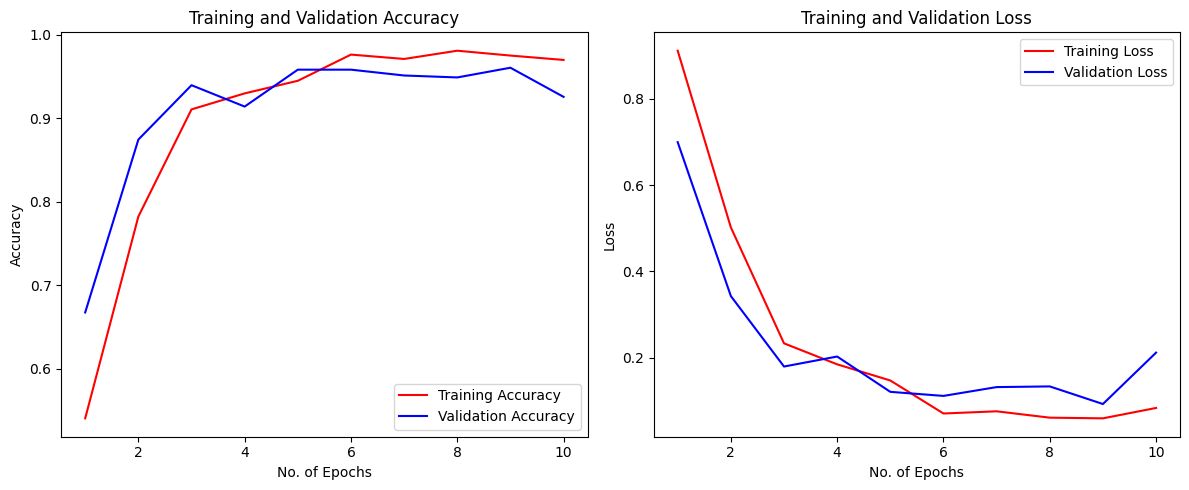

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Now we have 10 epochs

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting training and validation accuracy on the first subplot
axes[0].plot(epochs, potato_history.history['accuracy'], color='red', label='Training Accuracy')
axes[0].plot(epochs, potato_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
axes[0].set_xlabel('No. of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Plotting training and validation loss on the second subplot
axes[1].plot(epochs, potato_history.history['loss'], color='red', label='Training Loss')
axes[1].plot(epochs, potato_history.history['val_loss'], color='blue', label='Validation Loss')
axes[1].set_xlabel('No. of Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [18]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2152 files belonging to 3 classes.
Using 215 files for validation.


In [19]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step


In [20]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [21]:
Y_true

<tf.Tensor: shape=(215,), dtype=int64, numpy=
array([0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])>

In [22]:
predicted_categories

<tf.Tensor: shape=(215,), dtype=int64, numpy=
array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1])>

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [24]:
class_name = validation_set.class_names

In [25]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.49      0.48      0.49       104
 Potato___Late_blight       0.42      0.44      0.43        96
     Potato___healthy       0.00      0.00      0.00        15

             accuracy                           0.43       215
            macro avg       0.30      0.31      0.31       215
         weighted avg       0.43      0.43      0.43       215



In [26]:
cnn.save('/kaggle/working/potato_model.h5')